In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_polynomial_features(X, k):
    """
    Generate a matrix of polynomial features for a given input vector X.
    
    This function creates a matrix where each row corresponds to the powers of 
    the elements in the input vector `X`, up to degree `k-1`. The first column 
    is a bias term (all ones), followed by the original input vector, its square, 
    its cube, and so on, up to the specified polynomial degree.
    
    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input features (e.g., [x1, x2, x3, ...]).
        
    k : int
        The maximum degree of the polynomial features (inclusive of 1 but exclusive of k). 
        For example, if k = 4, the resulting features will include [1, X, X^2, X^3].
        
    Returns:
    -------
    ndarray
        A 2D numpy array where each row contains the polynomial features for the 
        corresponding element of `X`. The shape of the output array is `(len(X), k)`.
        
        Example:
            If X = [x1, x2, x3] and k = 4, the output will be:
            [[1, x1, x1^2, x1^3],
             [1, x2, x2^2, x2^3],
             [1, x3, x3^2, x3^3]]
    """
    features = [np.ones_like(X)]
    for degree in range(1, k):
        features.append(np.power(X, degree))

    return np.concatenate(features, axis=1)


In [3]:
def hat_w(X, y, k):
    """
    Compute the best weight for a regression model.
    
    This function calculates the weights `w` for a regression model 
    using the normal equation: 
        w = (ΦᵀΦ)^(-1)Φᵀy
    where:
        - `Φ` is the design matrix of polynomial features generated from `X`
        - `y` is the target vector
        - `w` is the vector of weights that minimizes the mean squared error.
    
    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input features (e.g., [x1, x2, x3, ...]).
    
    y : ndarray
        A 1D numpy array of target values corresponding to the input features.
    
    k : int
        The maximum degree of the polynomial features (inclusive of 1 but exclusive of k). 
        Determines the order of the polynomial model.
    
    Returns:
    -------
    ndarray
        A 1D numpy array containing the computed weights `w`. The size of `w` is equal to `k`, 
        corresponding to the number of polynomial terms (including the bias term).
    
    Example:
        If X = [x1, x2, x3], y = [y1, y2, y3], and k = 3, 
        this function returns the weights for a quadratic polynomial regression model.
    """
    phi = extract_polynomial_features(X, k)
    w = np.linalg.solve(phi.T @ phi, phi.T @ y)
    
    return w


In [4]:
def hat_w_pinv(X, y, k):
    """
    Compute the weights for a polynomial regression model using the pseudoinverse.

    This function calculates the weights `w` for a polynomial regression model 
    using the normal equation with the pseudoinverse:
        w = (ΦᵀΦ)^(-1)Φᵀy
    where:
        - `Φ` is the design matrix of polynomial features generated from `X`
        - `y` is the target vector
        - `w` is the vector of weights that minimizes the least squares error.
        
    The pseudoinverse is used instead of the direct inverse to handle cases where 
    the matrix `(ΦᵀΦ)` might be singular or not invertible.

    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input features (e.g., [x1, x2, x3, ...]).
    
    y : ndarray
        A 1D numpy array of target values corresponding to the input features.
    
    k : int
        The maximum degree of the polynomial features (inclusive of 1 but exclusive of k). 
        Determines the order of the polynomial model.

    Returns:
    -------
    ndarray
        A 1D numpy array containing the computed weights `w`. The size of `w` is equal to `k`, 
        corresponding to the number of polynomial terms (including the bias term).
    
    Example:
        If X = [x1, x2, x3], y = [y1, y2, y3], and k = 3, 
        this function returns the weights for a quadratic polynomial regression model.
    """
    phi = extract_polynomial_features(X, k)
    w = np.linalg.pinv(phi.T @ phi) @ phi.T @ y
    
    return w


In [5]:
def predict_polynomial(X, w, k):
    """
    Parameters:
    ----------
    X : ndarray
        A 1D numpy array of input features (e.g., [x1, x2, x3, ...]).
    
    w : ndarray
        A 1D numpy array of weights computed from the regression model. 
        The length of `w` should match the number of polynomial terms, i.e., `k`.
    
    k : int
        The maximum degree of the polynomial features (inclusive of 1 but exclusive of k).
        Determines the order of the polynomial model.
    
    Returns:
    -------
    ndarray
        A 1D numpy array of predicted values for the input `X`.
    
    """
    phi = extract_polynomial_features(X, k)
    
    return phi @ w


In [6]:
def g_sigma(x, sigma=0.07):
    """
    Generate noisy sinusoidal data with added Gaussian noise.
    
    This function computes the sine-squared of `x` and adds Gaussian noise with
    standard deviation `sigma` to the result.
    
    Parameters:
    ----------
    x : ndarray
        A 1D numpy array of input values (e.g., [x1, x2, x3, ...]).
    
    sigma : float, optional
        The standard deviation of the Gaussian noise to be added to the sine-squared values. 
        Default value is 0.07.
    
    Returns:
    -------
    ndarray
        A 1D numpy array of noisy output values. Each element is the sine-squared of 
        the corresponding `x` value with added Gaussian noise.
    
    """
    sin_squared = np.sin(2 * np.pi * x)**2
    epsilon = np.random.normal(0, sigma, size=x.shape)
    
    return sin_squared + epsilon


In [13]:
# Generate training data points
# reshape(-1, 1) reshapes the array into a column vector
x_train = np.random.uniform(0, 1, 30).reshape(-1, 1)
y_train = g_sigma(x_train, sigma=0.07)

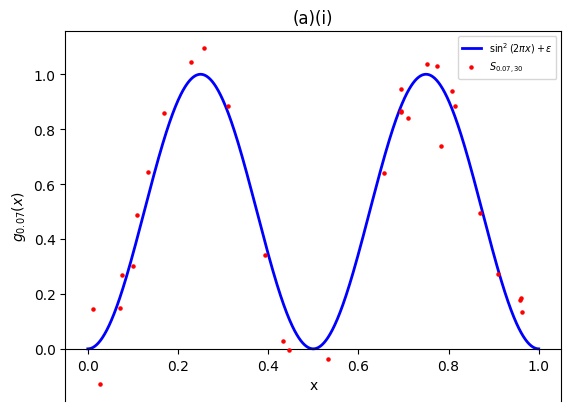

In [14]:
# (a)(i)
# Prepare plotting sin^2(2*pi*x)
x_fine = np.linspace(0, 1, 1000).reshape(-1, 1)
y_fine = (np.sin(2 * np.pi * x_fine)**2).reshape(-1, 1)

# Plot function
plt.plot(x_fine, y_fine, label=r'$\sin^2(2\pi x) + \epsilon$', color='blue', lw=2)
plt.scatter(x_train, y_train, color='red', label=r'$S_{0.07,30}$', zorder=5, s=5)

plt.xlabel('x')
plt.ylabel('$g_{0.07}(x)$')
plt.title('(a)(i)')
plt.legend(fontsize='x-small')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
plt.show()

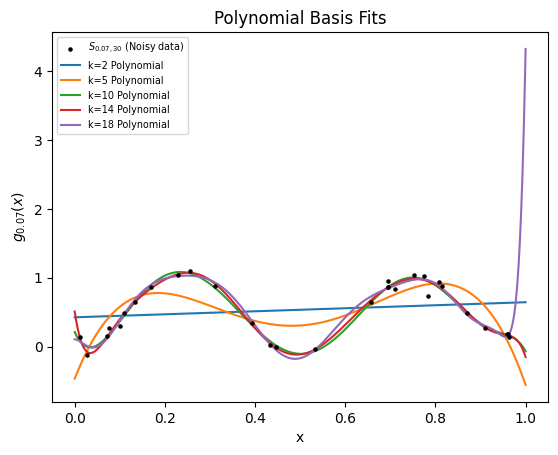

In [15]:
# (a)(ii)
plt.scatter(x_train, y_train, color='black', label=r'$S_{0.07,30}$ (Noisy data)', zorder=5, s=5)

for k in [2, 5, 10, 14, 18]:
    w = hat_w(x_train, y_train, k)
    y_pred = predict_polynomial(x_fine, w, k)
    
    plt.plot(x_fine, y_pred, label=f'k={k} Polynomial')

plt.xlabel('x')
plt.ylabel('$g_{0.07}(x)$')
plt.title('Polynomial Basis Fits')
plt.legend(fontsize = 'x-small' )
plt.show()

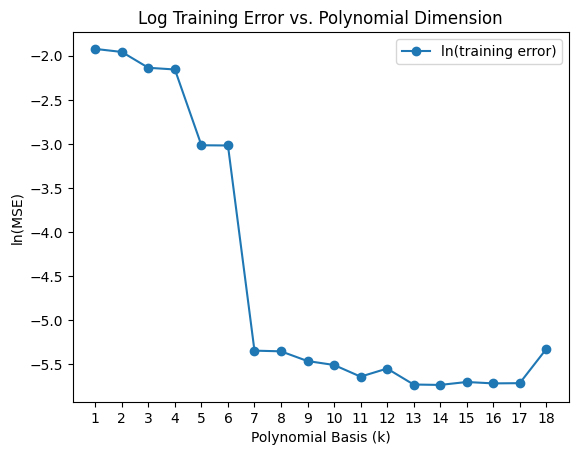

In [16]:
# (b)
training_errors = []

for k in range(1,19):
    w = hat_w(x_train, y_train, k)
    
    y_pred = predict_polynomial(x_train, w, k)
    
    mse = np.mean((y_train - y_pred)**2)
    training_errors.append(mse)
    
ln_training_errors = np.log(training_errors)

plt.plot(range(1, 19), ln_training_errors, marker='o', label="ln(training error)")

plt.xlabel('Polynomial Basis (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Training Error vs. Polynomial Dimension')
plt.xticks(range(1, 19))
plt.legend()
plt.show()

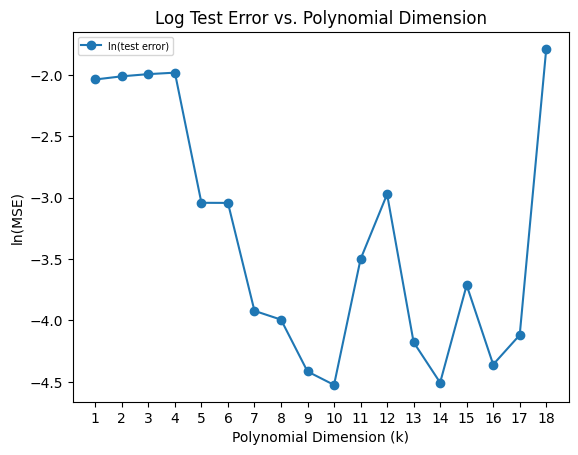

In [17]:
# (c)
# Generate test set T with 1000 samples
x_test = np.random.uniform(0, 1, 1000).reshape(-1, 1)
y_test = g_sigma(x_test, sigma=0.07)

test_errors = []

for k in range(1, 19):
    w_train = hat_w(x_train, y_train, k)
    
    phi_test = extract_polynomial_features(x_test, k)
    
    y_test_pred = phi_test @ w_train
    
    mse_test = np.mean((y_test - y_test_pred)**2)
    test_errors.append(mse_test)

ln_test_errors = np.log(test_errors)

plt.plot(range(1, 19), ln_test_errors, marker='o', label="ln(test error)")
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Test Error vs. Polynomial Dimension')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()

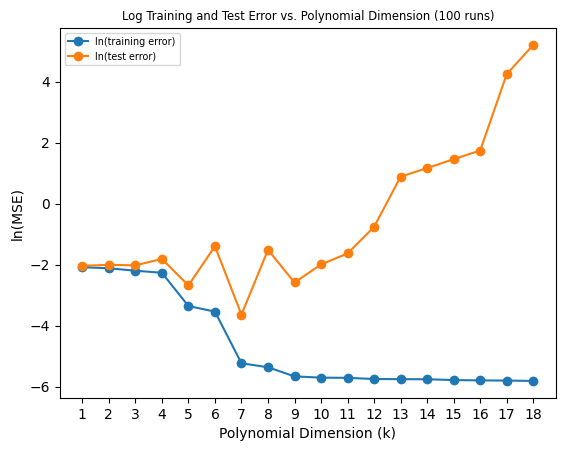

In [18]:
# (d)
num_runs = 100
training_errors = np.zeros(18)
test_errors = np.zeros(18)

# Generate test set T with 1000 samples
X_test = np.random.uniform(0, 1, 1000).reshape(-1, 1)
Y_test = g_sigma(X_test, sigma=0.07)

for run in range(num_runs):

    # Generate training data points
    X_train = np.random.uniform(0, 1, 30).reshape(-1, 1)
    Y_train = g_sigma(X_train, sigma=0.07)

    for k in range(1, 19):
        
        # Pseudoinverse to tackle invertibility issues
        W_train = hat_w_pinv(X_train, Y_train, k)

        Y_train_pred = predict_polynomial(X_train, W_train, k)
        Y_test_pred = predict_polynomial(X_test, W_train, k)

        training_errors[k-1] += np.mean((Y_train - Y_train_pred)**2)
        test_errors[k-1] += np.mean((Y_test - Y_test_pred)**2)

training_errors /= num_runs
test_errors /= num_runs

ln_training_errors = np.log(training_errors)
ln_test_errors = np.log(test_errors)

plt.plot(range(1, 19), ln_training_errors, marker='o', label="ln(training error)")
plt.plot(range(1, 19), ln_test_errors, marker='o', label="ln(test error)")
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title(f'Log Training and Test Error vs. Polynomial Dimension ({num_runs} runs)', fontsize='small')
plt.xticks(range(1, 19))
plt.legend(fontsize='x-small')
plt.show()
